We will be using beautiful soup for parsing the html

In [83]:
!pip install beautifulsoup4

In [84]:
import bs4
import os

In [85]:
filenames = os.listdir()
filenames

['.config',
 'Unregistered_submission.csv',
 'page5.html',
 'page3.html',
 'page1.html',
 'page4.html',
 'page7.html',
 'page2.html',
 'Registered_submission.csv',
 'responses.csv',
 'page6.html',
 'sample_data']

In [86]:
"""Some tags have different class names ending with rg_3
In following lines of code we change such class names so that they end with rg_5
"""
for filename in filenames:
    if(filename.endswith(".html") and (filename is not "Registered_submission.csv") and (filename is not "Unregistered_submission.csv")):
        print(filename)
        file = open(filename,"r+")
        str=file.read().replace("rg_3","rg_5")
        #print(str)
        file.seek(0)
        file.write(str)
        file.close()

page5.html
page3.html
page1.html
page4.html
page7.html
page2.html
page6.html


In [87]:
score_count=0 #variable to count score for data verification
usernames_list=[]
scores_list=[]
for filename in filenames:
    if(filename.endswith(".html")):
        print(filename,end=" ")
        file = open(filename)
        hr_parser = bs4.BeautifulSoup(file, "html.parser")
        usernames=hr_parser.find_all(name="a",attrs={"class":"cursor leaderboard-hackername rg_5"})
        for username in usernames:
            #print(username.contents[0].strip())
            usernames_list.append(username.contents[0].strip())
        print(f"Usernames = {len(usernames)}")

        scores=hr_parser.find_all(name="div",attrs={"class":"span-flex-3"})
        for score in scores:
            #print(len(score.contents[1].contents), score.contents[1].contents )
            if len(score.contents[1].contents)==1:
                #print(score.contents[1].contents[0].strip())
                scores_list.append(score.contents[1].contents[0].strip())
                score_count+=1
        file.close()
print(f"Total username = {len(usernames_list)}")
print(f"Total scores = {score_count}")

page5.html Usernames = 100
page3.html Usernames = 100
page1.html Usernames = 100
page4.html Usernames = 100
page7.html Usernames = 75
page2.html Usernames = 100
page6.html Usernames = 100
Total username = 675
Total scores = 675


In [88]:
usernames_list_mapped=map(lambda x: x.lower().strip(), usernames_list)
usernames_list=[]
for un in usernames_list_mapped:
    usernames_list.append(un)
usernames_list

['raka7317',
 'shivang_2024csi1',
 'sec_g_1112',
 'geetesh_k1085',
 'sec_i_01139',
 'shruti_2024cs101',
 'rishabh_2024en12',
 'shaku_in',
 'mohd_2024cse1152',
 'abhishek_2024it1',
 'deepanshu_2024c2',
 'abhishek_2024cs3',
 'sec_f_1008',
 'sec_j_1158',
 'shreya_2024ec101',
 'sec_g_1093',
 '_pushpendra_12',
 'sec_p_1162',
 'sec_s_cs1018',
 'arun_2024en1048',
 'priyanshu_2024i1',
 'shauryaa007',
 'sec_a_1193',
 'sec_d_1155',
 'sec_x_1129',
 'anushka_2024ec11',
 'ag2532460',
 'utkarsh_2024cs12',
 'sec_c_1158',
 'srishti_2024it11',
 'khushivaish16',
 'aditya_2024ec111',
 'sec_k_1027',
 'sec_b_1075',
 'sec_s_cs1147',
 'arjun_2024cse101',
 'rudra_2024me1103',
 'abhishek_2024cs4',
 'sec_k_1082',
 'sec_s_en1087',
 'sec_s_cs1126',
 'sec_i_1147',
 'sec_w_cs1079',
 'yash_2024it1192',
 'garvit_2024csit1',
 'suyasha_2024it11',
 'sec_s_it1022',
 'sec_b_1191',
 'sec_j_1140',
 'sec_k_it1114',
 'rekhagupta369',
 'naman_2024ce1046',
 'sec_m_1099',
 'sec_m_049',
 'harsh_p_1029',
 'sec_e_ce_1007',
 'sec_e_

In [89]:
"""
#To download extracted usernames in csv format
sample=pd.DataFrame(usernames_list,columns=["username"])
sample.to_csv("total_username.csv")
"""

'\n#To download extracted usernames in csv format\nsample=pd.DataFrame(usernames_list,columns=["username"])\nsample.to_csv("total_username.csv")\n'

In [90]:
import pandas as pd
import os
files=os.listdir()

In [91]:
#Opening the student registration .csv file
f=None
for f in files:
    if f.endswith(".csv") and (f != "Registered_submission.csv") and (f != "Unregistered_submission.csv"):
        break
f

'responses.csv'

In [92]:
df = pd.read_csv(f)
df

,Timestamp,Email Address,Complete Name,Father's Name,Section,Branch,Official KIET Email ID,University Roll Number of AKTU,Class Roll Number,KIET Library ID,Enter Your Official HackerRank Username,Phone Number
0,6/2/2021 17:24:21,shashank.2024it1047@kiet.edu,Shashank singh,Mr. Gyanendra Kumar Singh,K,IT,NaN,2000290130151,NaN,2024iy1047,Shashankit1047,8299612469
1,6/2/2021 17:27:12,utkarsh.2024ec1056@kiet.edu,Utkarsh Tripathi,Rajeev Kumar Tripathi,K,ECE,NaN,2000290310181,NaN,2024ec1056,utkarsh_ec_1056K,9555280997
2,6/2/2021 17:29:31,nanditayadav1711@gmail.com,Nandita Yadav,Mr. Parvesh Yadav,K,CS,nandita.2024cs1114@kiet.edu,2000290120100,NaN,2024cs1114,Sec_K_CS1114,7457017669
3,6/2/2021 17:35:22,abdul.2024csit1070@kiet.edu,AbdulQuadir,Shakeel khan,O,CSIT,abdul.2024csit1070@kiet.edu,2000290110005,NaN,2024CSIT1070,abdul_2024csit12,7906739627
4,6/2/2021 17:35:42,sujaltyagi03@gmail.com,Sujal Tyagi,Narendra Tyagi,F,EN,sujal.2024en1014@kiet.edu,2000290210137,NaN,2024en1014,Sec_f_1014,9548609022
...,...,...,...,...,...,...,...,...,...,...,...,...
956,6/6/2021 18:10:26,asthana.2024ec1160@kiet.edu,Asthana somya subhash,Subhash asthana,B,ECE,asthana.2024ec1160@kiet.edu,2000290310050,15.0,2024ec1160,sec_B_1160,8738023479
957,6/6/2021 19:08:37,shivam.2024EN1026@kiet.edu,Shivam Tyagi,Vikas Tyagi,X,EN,shivam.2024EN1026@kiet.edu,2000290210126,46.0,2024en1026,shivam_2024en101,8800530940
958,6/6/2021 19:41:57,chabhishekvimal@gmail.com,Abhishek kumar vimal,Ashok kumar,X,EN,abhishek.2024en1009@kiet.edu,2000290210007,3.0,1009,Abhishek_2024en1,8595927752
959,6/6/2021 19:51:55,geetesh.2024it1085@kiet.edu,GEETESH YADAV,PRADEEP KUMAR YADAV,K,IT,geetesh.2024it1085@kiet.edu,2000290130072,16.0,2024it1085,geetesh_k1085,9528320885


In [93]:
df=df.rename(columns = {"Enter Your Official HackerRank Username": "username"})

In [94]:
type(df["username"])

pandas.core.series.Series

In [95]:
df["username"] = df["username"].apply(lambda x: x.lower().strip())
df["username"]

0        shashankit1047
1      utkarsh_ec_1056k
2          sec_k_cs1114
3      abdul_2024csit12
4            sec_f_1014
             ...       
956          sec_b_1160
957    shivam_2024en101
958    abhishek_2024en1
959       geetesh_k1085
960          sec_b_1073
Name: username, Length: 961, dtype: object

In [96]:
#iterate over the extracted usernames in HackerRank submission and find out the records from registration form csv
filtered_submission=pd.DataFrame()
filtered_submission = pd.concat([filtered_submission,df.loc[df['username'].isin(usernames_list)]])
print(f"\n\n ")   
filtered_submission.drop_duplicates(subset ="username",keep = 'last', inplace = True)
print(filtered_submission.count())
filtered_submission



 
Timestamp                         553
Email Address                     553
Complete Name                     553
Father's Name                     553
Section                           553
Branch                            553
Official KIET Email ID            363
University Roll Number of AKTU    553
Class Roll Number                 528
KIET Library ID                   553
username                          553
Phone Number                      553
dtype: int64


,Timestamp,Email Address,Complete Name,Father's Name,Section,Branch,Official KIET Email ID,University Roll Number of AKTU,Class Roll Number,KIET Library ID,username,Phone Number
1,6/2/2021 17:27:12,utkarsh.2024ec1056@kiet.edu,Utkarsh Tripathi,Rajeev Kumar Tripathi,K,ECE,NaN,2000290310181,NaN,2024ec1056,utkarsh_ec_1056k,9555280997
2,6/2/2021 17:29:31,nanditayadav1711@gmail.com,Nandita Yadav,Mr. Parvesh Yadav,K,CS,nandita.2024cs1114@kiet.edu,2000290120100,NaN,2024cs1114,sec_k_cs1114,7457017669
3,6/2/2021 17:35:22,abdul.2024csit1070@kiet.edu,AbdulQuadir,Shakeel khan,O,CSIT,abdul.2024csit1070@kiet.edu,2000290110005,NaN,2024CSIT1070,abdul_2024csit12,7906739627
4,6/2/2021 17:35:42,sujaltyagi03@gmail.com,Sujal Tyagi,Narendra Tyagi,F,EN,sujal.2024en1014@kiet.edu,2000290210137,NaN,2024en1014,sec_f_1014,9548609022
6,6/2/2021 17:38:01,sejal.2024cs1006@kiet.edu,Sejal Gupta,Shesh Mani Gupta,L,CS,NaN,2000290120140,NaN,2024cs1006,sec_l_cs1006,6388207179
...,...,...,...,...,...,...,...,...,...,...,...,...
956,6/6/2021 18:10:26,asthana.2024ec1160@kiet.edu,Asthana somya subhash,Subhash asthana,B,ECE,asthana.2024ec1160@kiet.edu,2000290310050,15.0,2024ec1160,sec_b_1160,8738023479
957,6/6/2021 19:08:37,shivam.2024EN1026@kiet.edu,Shivam Tyagi,Vikas Tyagi,X,EN,shivam.2024EN1026@kiet.edu,2000290210126,46.0,2024en1026,shivam_2024en101,8800530940
958,6/6/2021 19:41:57,chabhishekvimal@gmail.com,Abhishek kumar vimal,Ashok kumar,X,EN,abhishek.2024en1009@kiet.edu,2000290210007,3.0,1009,abhishek_2024en1,8595927752
959,6/6/2021 19:51:55,geetesh.2024it1085@kiet.edu,GEETESH YADAV,PRADEEP KUMAR YADAV,K,IT,geetesh.2024it1085@kiet.edu,2000290130072,16.0,2024it1085,geetesh_k1085,9528320885


In [97]:
#to create a csv file of students whose username matched with registration contest registration form
#filtered_submission["username"].to_csv("results.csv")

In [98]:
#Find the scores of the filtered students
scores_filtered = []
unique_usernames = set()

#Adding scores to the filtered details of students
for un_filtered in filtered_submission["username"]:
    for un, score in zip(usernames_list, list(scores_list)):
        if un_filtered == un and (un not in unique_usernames):#ensuring no duplicacy of usernames
            #print(f"Filtered_username: {un} Score: {score}")
            scores_filtered.append(score)
            unique_usernames.add(un)
len(scores_filtered)

553

In [99]:
#adding a new column to filtered submission
filtered_submission["Scores"]=scores_filtered
filtered_submission

,Timestamp,Email Address,Complete Name,Father's Name,Section,Branch,Official KIET Email ID,University Roll Number of AKTU,Class Roll Number,KIET Library ID,username,Phone Number,Scores
1,6/2/2021 17:27:12,utkarsh.2024ec1056@kiet.edu,Utkarsh Tripathi,Rajeev Kumar Tripathi,K,ECE,NaN,2000290310181,NaN,2024ec1056,utkarsh_ec_1056k,9555280997,400.00
2,6/2/2021 17:29:31,nanditayadav1711@gmail.com,Nandita Yadav,Mr. Parvesh Yadav,K,CS,nandita.2024cs1114@kiet.edu,2000290120100,NaN,2024cs1114,sec_k_cs1114,7457017669,200.00
3,6/2/2021 17:35:22,abdul.2024csit1070@kiet.edu,AbdulQuadir,Shakeel khan,O,CSIT,abdul.2024csit1070@kiet.edu,2000290110005,NaN,2024CSIT1070,abdul_2024csit12,7906739627,400.00
4,6/2/2021 17:35:42,sujaltyagi03@gmail.com,Sujal Tyagi,Narendra Tyagi,F,EN,sujal.2024en1014@kiet.edu,2000290210137,NaN,2024en1014,sec_f_1014,9548609022,400.00
6,6/2/2021 17:38:01,sejal.2024cs1006@kiet.edu,Sejal Gupta,Shesh Mani Gupta,L,CS,NaN,2000290120140,NaN,2024cs1006,sec_l_cs1006,6388207179,400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,6/6/2021 18:10:26,asthana.2024ec1160@kiet.edu,Asthana somya subhash,Subhash asthana,B,ECE,asthana.2024ec1160@kiet.edu,2000290310050,15.0,2024ec1160,sec_b_1160,8738023479,400.00
957,6/6/2021 19:08:37,shivam.2024EN1026@kiet.edu,Shivam Tyagi,Vikas Tyagi,X,EN,shivam.2024EN1026@kiet.edu,2000290210126,46.0,2024en1026,shivam_2024en101,8800530940,366.67
958,6/6/2021 19:41:57,chabhishekvimal@gmail.com,Abhishek kumar vimal,Ashok kumar,X,EN,abhishek.2024en1009@kiet.edu,2000290210007,3.0,1009,abhishek_2024en1,8595927752,341.67
959,6/6/2021 19:51:55,geetesh.2024it1085@kiet.edu,GEETESH YADAV,PRADEEP KUMAR YADAV,K,IT,geetesh.2024it1085@kiet.edu,2000290130072,16.0,2024it1085,geetesh_k1085,9528320885,400.00


In [100]:
#To generate csv file of registered students who participated in the event
filtered_submission.to_csv("Registered_submission.csv")

In [101]:
unfiltered_submissions=[]
for un in usernames_list:
    un_df = [x for x in df["username"]]
    if un not in un_df:
        print(un) 
        unfiltered_submissions.append(un)
len(unfiltered_submissions)

shivang_2024csi1
mohd_2024cse1152
abhishek_2024it1
shreya_2024ec101
priyanshu_2024i1
sec_x_1129
anushka_2024ec11
ag2532460
khushivaish16
aditya_2024ec111
sec_k_it1114
rekhagupta369
sec_e_ce_1007
nikita_2024cs111
aashishraghav24
sec_e_1057
sec_x_cse1071
khyati_2024cse11
anvay_2024ec1053
e_arpit_mishra
nigam_2024ec1078
sec_x_1071
sec_e_1142
jyoti_2024it1144
sec_u_1004
ahmadhamdan041
romit_2024en1156
sectionc2024cev
sec_m_040_
sec_x_ec1047
rajneesh_2024it1
sakshi_2024en101
saeedamrohvi
saksham_2024cs11
sec_i_1068
samarth_2024ce11
mayank_2024ce101
gulshankalwani02
amit_2024me1030
arshivaastha
ravi_2024me1072
shanutyagi560
ujjawal_2024en11
sec_m_010
section_l_rajani
sec_i_040
akash_2024ec1200
rudransh9119
ananya_2024me101
sec_a_1063
swati_2024en1146
sachin_2024cs101
sec_s_csit1170
shreyansh_2024m1
sec_x_1185
riya_maheshwari
sec_m_051
harshita_2024en1
mansimittal2003
ayushi_2024it111
arpita_2024cse11
ayush_2024cs1200
nidhi_2024en1021
shreya_2024en101
shama_2024it1159
sec_t_1092
rajveer_2024c

122

In [102]:
#To generate csv file of unregistered students who participated in the event
sample=pd.DataFrame(unfiltered_submissions,columns=["Unregistered Submissions"])
sample.to_csv("Unregistered_submission.csv")

## Plotting the Results

In [103]:
frequency = filtered_submission.groupby("Section").count()

In [104]:
frequency

,Timestamp,Email Address,Complete Name,Father's Name,Branch,Official KIET Email ID,University Roll Number of AKTU,Class Roll Number,KIET Library ID,username,Phone Number,Scores
Section,,,,,,,,,,,,
A,24,24,24,24,24,20,24,24,24,24,24,24
B,44,44,44,44,44,30,44,44,44,44,44,44
C,23,23,23,23,23,19,23,22,23,23,23,23
D,17,17,17,17,17,11,17,11,17,17,17,17
E,23,23,23,23,23,14,23,23,23,23,23,23
F,17,17,17,17,17,12,17,14,17,17,17,17
G,23,23,23,23,23,20,23,23,23,23,23,23
H,12,12,12,12,12,6,12,11,12,12,12,12
I,24,24,24,24,24,15,24,23,24,24,24,24


In [105]:
#adding count of unregistered users
import numpy as np
unreg = pd.DataFrame(np.repeat(len(unfiltered_submissions), len(frequency.columns))[None, :], 
                  columns=frequency.columns,
                  index=["Unregistered"])
#unreg["Timestamp"]=[dt_string]
#unreg
frequency = pd.concat([frequency, unreg])
frequency

,Timestamp,Email Address,Complete Name,Father's Name,Branch,Official KIET Email ID,University Roll Number of AKTU,Class Roll Number,KIET Library ID,username,Phone Number,Scores
A,24,24,24,24,24,20,24,24,24,24,24,24
B,44,44,44,44,44,30,44,44,44,44,44,44
C,23,23,23,23,23,19,23,22,23,23,23,23
D,17,17,17,17,17,11,17,11,17,17,17,17
E,23,23,23,23,23,14,23,23,23,23,23,23
F,17,17,17,17,17,12,17,14,17,17,17,17
G,23,23,23,23,23,20,23,23,23,23,23,23
H,12,12,12,12,12,6,12,11,12,12,12,12
I,24,24,24,24,24,15,24,23,24,24,24,24
J,28,28,28,28,28,19,28,27,28,28,28,28


In [106]:
frequency_sorted=frequency.sort_values("Timestamp")

In [107]:
frequency_sorted=frequency_sorted[["Timestamp"]]
frequency_sorted=frequency_sorted.rename(columns = {"Timestamp": "Submissions"})

In [108]:
t=zip(list(frequency_sorted.index),list(frequency_sorted["Submissions"]))
for i in t:
    print(i)

('O', 9)
('H', 12)
('D', 17)
('F', 17)
('U', 17)
('R', 18)
('L', 18)
('W', 19)
('X', 19)
('V', 20)
('Q', 21)
('C', 23)
('E', 23)
('G', 23)
('N', 23)
('A', 24)
('I', 24)
('P', 26)
('M', 28)
('J', 28)
('K', 30)
('T', 34)
('S', 36)
('B', 44)
('Unregistered', 122)


In [109]:
import statistics
mean_registration = statistics.mean(frequency_sorted["Submissions"])
mean_registration

27

In [110]:
import datetime
now = datetime.datetime.now()
# dd/mm/YY H:M:S
#dt_string = now.strftime("%d/%m/%Y %I:%M:%S %p")
dt_string = now.strftime("%d/%m/%Y")
dt_string

'06/06/2021'

(0, 9)
(1, 12)
(2, 17)
(3, 17)
(4, 17)
(5, 18)
(6, 18)
(7, 19)
(8, 19)
(9, 20)
(10, 21)
(11, 23)
(12, 23)
(13, 23)
(14, 23)
(15, 24)
(16, 24)
(17, 26)
(18, 28)
(19, 28)
(20, 30)
(21, 34)
(22, 36)
(23, 44)
(24, 122)


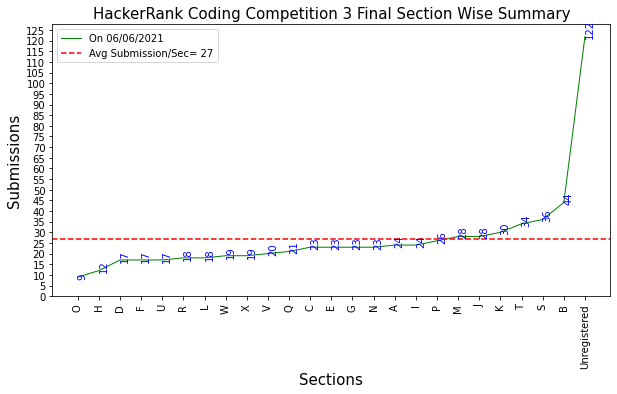

In [124]:
ax=frequency_sorted.plot(xlabel="Section",ylabel="Submissions",legend=False,figsize=(10, 5),color="green",linewidth=1,rot=90,fontsize=10)
ax.set_title("HackerRank Coding Competition 3 Final Section Wise Summary",fontsize=15)
ax.set_xlabel("Sections", fontsize=15)
ax.set_ylabel("Submissions", fontsize=15)
ax.set_xticks(range(len(list(frequency_sorted.index))))
ax.set_xticklabels(list(frequency_sorted.index))
ax.set_yticks(range(0,130,5))
ax.axhline(y=mean_registration, color='r', linestyle='--')
ax.legend([f"On {dt_string}",f"Avg Submission/Sec= {mean_registration}"],loc=2)
for xy in zip(range(len(list(frequency_sorted.index))),list(frequency_sorted["Submissions"])):    
    print(xy)                                   # <--
    ax.annotate(xy[1], xy=xy,color="blue",fontsize=10,rotation=90)

# Pie Chart

A Pie chart representing total participation wrt to total first year students

In [ ]:
import matplotlib.pyplot as plt

y = np.array([len(usernames_list), 1323-len(usernames_list)])
myexplode = [0.1, 0 ]
plt.pie(y, labels=[f"Participated {len(usernames_list)}", f"Not Participated {1323-len(usernames_list)}"],autopct='%1.0f%%',explode=myexplode,startangle=45)
plt.legend()
plt.title(f"Final HackerRank Participation Status",fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))

c_br = (frequency_sorted["Submissions"])
f_normal = (frequency_sorted["Submissions"]) / (frequency_sorted["Submissions"]).max()

plt.scatter(frequency_sorted.index, frequency_sorted["Submissions"], 
                  c=c_br,
                 alpha=0.5,
                s = f_normal * 1000
                )

plt.xlabel("Sections", size=14)
plt.ylabel("Submissions", size=14)

In [134]:
cpp_faculties={"A":"Dr. Aditya", 
             "B":"Mr. Anubhav", 
             "C":"Ms Aashi", 
             "D":"Ms.Shweta", 
             "E":"Mr. Hriday",
             "F":"Ms. Shweta",
             "G":"Ms Aashi",
             "H":"Ms. Shweta",
             "I":"Ms. Madhu",
             "J":"Ms. Aashi",
             "K":"Mr. Naveen",
             "L":"Ms. Neha",
             "M":"Ms. Madhu",
             "N":"Ms. Shalika",
             "O":"Ms. Neha",
             "P":"Ms. Aashi",
             "Q":"Mr. Umang",
             "R":"Ms. Shweta",
             "S":"Mr. Rajiv",
             "T":"Mr. Nitin",
             "U":"Mr. Abhinav",
             "V":"Mr. Deepak",
             "W":"Mr. Abhinav",
             "X":"Ms. Preeti",
             "Unregistered":"NA"
            }   
cpp_faculties

{'A': 'Dr. Aditya',
 'B': 'Mr. Anubhav',
 'C': 'Ms Aashi',
 'D': 'Ms.Shweta',
 'E': 'Mr. Hriday',
 'F': 'Ms. Shweta',
 'G': 'Ms Aashi',
 'H': 'Ms. Shweta',
 'I': 'Ms. Madhu',
 'J': 'Ms. Aashi',
 'K': 'Mr. Naveen',
 'L': 'Ms. Neha',
 'M': 'Ms. Madhu',
 'N': 'Ms. Shalika',
 'O': 'Ms. Neha',
 'P': 'Ms. Aashi',
 'Q': 'Mr. Umang',
 'R': 'Ms. Shweta',
 'S': 'Mr. Rajiv',
 'T': 'Mr. Nitin',
 'U': 'Mr. Abhinav',
 'Unregistered': 'NA',
 'V': 'Mr. Deepak',
 'W': 'Mr. Abhinav',
 'X': 'Ms. Preeti'}

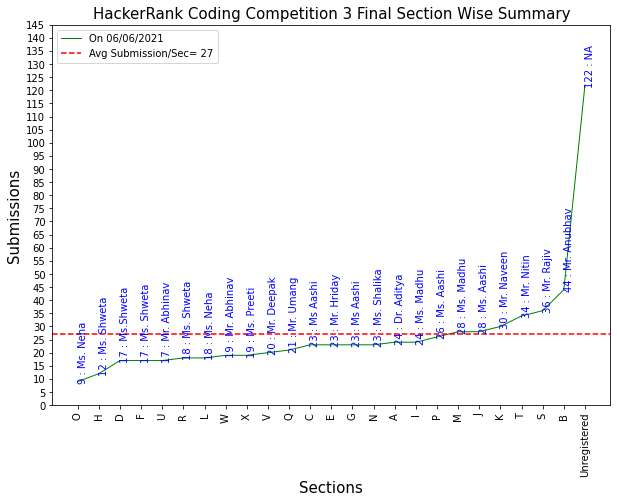

In [138]:
#Again plotting the line plot but with faculty names
ax=frequency_sorted.plot(xlabel="Section",ylabel="Submissions",legend=False,figsize=(10, 7),color="green",linewidth=1,rot=90,fontsize=10)
ax.set_title("HackerRank Coding Competition 3 Final Section Wise Summary",fontsize=15)
ax.set_xlabel("Sections", fontsize=15)
ax.set_ylabel("Submissions", fontsize=15)
ax.set_xticks(range(len(list(frequency_sorted.index))))
ax.set_xticklabels(list(frequency_sorted.index))
ax.set_yticks(range(0,146,5))
ax.axhline(y=mean_registration, color='r', linestyle='--')
ax.legend([f"On {dt_string}",f"Avg Submission/Sec= {mean_registration}"],loc=2)
i=0
for xy in zip(range(len(list(frequency_sorted.index))),list(frequency_sorted["Submissions"])):                                 # <--
    ax.annotate(f"{xy[1]} : {cpp_faculties[frequency_sorted.index[i]]}", xy=xy,color="blue",fontsize=10,rotation=90)
    i+=1

AttributeError: ignored